# Binary Classifier using Logistic Regression

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
from sklearn import linear_model

In [2]:
data = np.loadtxt('rawData1.txt', delimiter=',')

In [3]:
#np.random.shuffle(data) # randomize the examples of data

In [4]:
[k,l] = data.shape # dimensions of data

In [5]:
print "The data has %i examples and %i features." %(k,l)

The data has 100 examples and 3 features.


In [6]:
print "The features are 'Evaluation 1', 'Evaluation 2', 'Disease State'."

The features are 'Evaluation 1', 'Evaluation 2', 'Disease State'.


In [7]:
data[:10,:] # print data (first 10 examples only)

array([[ 76.979,  47.576,   1.   ],
       [ 67.372,  42.838,   0.   ],
       [ 52.348,  60.77 ,   0.   ],
       [ 89.677,  65.799,   1.   ],
       [ 55.482,  35.571,   0.   ],
       [ 88.914,  69.804,   1.   ],
       [ 34.525,  60.396,   0.   ],
       [ 60.183,  86.309,   1.   ],
       [ 80.19 ,  44.822,   1.   ],
       [ 60.458,  73.095,   1.   ]])

In [8]:
m = int(np.ceil(0.60 * k)); # m=(number of training examples)

In [9]:
print "Training set: %i examples (60%% of the data)." %m 
print "Cross Validation set: %i examples (the other 40%%)." %(k-m) 

Training set: 60 examples (60% of the data).
Cross Validation set: 40 examples (the other 40%).


In [10]:
dataTrain = data[:m,:] # first 60 examples of data for training

In [11]:
dataCV = data[m:,:] # last 40 examples of data for cross validation

In [12]:
X = dataTrain[:, :2] # define X (training predictors)

In [13]:
y = dataTrain[:, 2] # define y (training responses)

In [14]:
Xcv = dataCV[:, :2] # define Xcv (cross validation predictors)

In [15]:
ycv = dataCV[:, 2] # define ycv (cross validation responses)

In [16]:
pos = dataTrain[y == 1]; neg = dataTrain[y == 0] # split up positive/negative training examples

In [17]:
poscv = dataCV[ycv == 1]; negcv = dataCV[ycv == 0] # split up positive/negative cross validation examples

In [18]:
[P, N] = [pos.shape[0] , neg.shape[0]] # number of positive and negative examples
print "There are %i positive training examples and %i negative training examples." %(P,N)

if max(float(P)/m, float(N)/m) >= 0.80:
    print "We have skewed classes." 
else:
    print "We don't have skewed classes."

There are 35 positive training examples and 25 negative training examples.
We don't have skewed classes.


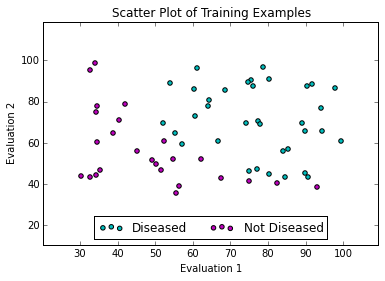

In [19]:
# Plot the training points
plt.figure()
pscatt = plt.scatter(pos[:,0], pos[:,1], color = 'c', marker = 'o', edgecolors='k')
nscatt = plt.scatter(neg[:,0], neg[:,1], color = 'm', marker = 'o', edgecolors='k')
plt.xlabel('Evaluation 1')
plt.ylabel('Evaluation 2')
plt.legend([pscatt, nscatt], ['Diseased', 'Not Diseased'], loc="lower center", ncol=2)
plt.title('Scatter Plot of Training Examples')
x_min, x_max = X[:,0].min() - 10, X[:,0].max() + 10
y_min, y_max = X[:,1].min() - 25, X[:,1].max() + 20
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)

plt.show()
plt.close()

In [20]:
print "Statistics of 'Evaluation 1': (Numbers are rounded for easy reading) \n"
mu1 = np.mean(X[:,0])
print "The mean is %i." %mu1
s1 = np.std(X[:,0])
print "The standard deviation is %i." %s1
[min1, max1] = [np.min(X[:,0]), np.max(X[:,0])]
print "The range is %i to %i." %(min1,max1)

Statistics of 'Evaluation 1': (Numbers are rounded for easy reading) 

The mean is 65.
The standard deviation is 20.
The range is 30 to 99.


In [21]:
print "Statistics of 'Evaluation 2': (Numbers are rounded for easy reading) \n"
mu2 = np.mean(X[:,1])
print "The mean is %i." %mu2
s2 = np.std(X[:,1])
print "The standard deviation is %i." %s2
[min2, max2] = [np.min(X[:,1]), np.max(X[:,1])]
print "The range is %i to %i." %(min2, max2)

Statistics of 'Evaluation 2': (Numbers are rounded for easy reading) 

The mean is 65.
The standard deviation is 18.
The range is 35 to 98.


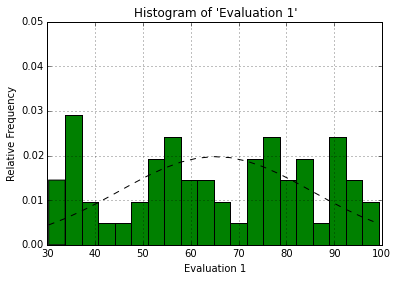

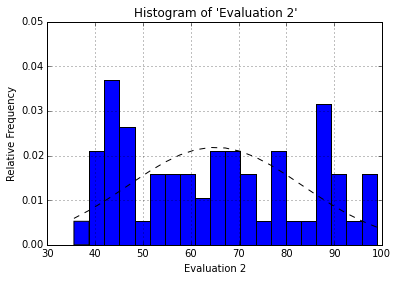

In [22]:
# Histogram for 'Evaluation 1'
plt.figure(1)

# create parameters for histogram
n, bins, patches = plt.hist(X[:,0], 20, normed=1, facecolor = 'g', cumulative=False)

# plot options
plt.xlabel('Evaluation 1')
plt.ylabel('Relative Frequency')
plt.title("Histogram of 'Evaluation 1'")
plt.axis([30, 100, 0, 0.05])
plt.grid(True)

# add a normal curve
norms = mlab.normpdf(bins, mu1, s1)
plt.plot(bins, norms, 'k--', linewidth=1)


# Histogram for 'Evaluation 2'
plt.figure(2)

# create parameters for histogram
n, bins, patches = plt.hist(X[:,1], 20, normed=1, facecolor = 'b', cumulative=False)

# plot options
plt.xlabel('Evaluation 2')
plt.ylabel('Relative Frequency')
plt.title("Histogram of 'Evaluation 2'")
plt.axis([30, 100, 0, 0.05])
plt.grid(True)

# add a normal curve
norms = mlab.normpdf(bins, mu2, s2)
plt.plot(bins, norms, 'k--', linewidth=1)


plt.show()
plt.close()

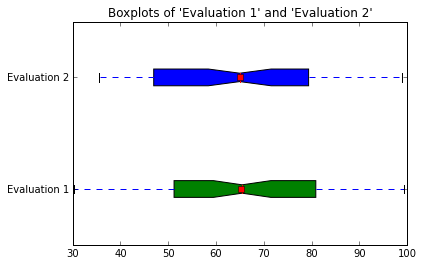

In [23]:
# boxplots of 'Evaluation 1' and 'Evaluation 2'
plt.figure()

bp = plt.boxplot(X, notch=True, showmeans=True, vert=False, labels=['Evaluation 1', 'Evaluation 2'], patch_artist=True)
colors=['green', 'blue']

for patch, color in zip(bp['boxes'], colors):
    patch.set_facecolor(color)

plt.title("Boxplots of 'Evaluation 1' and 'Evaluation 2'")    
plt.show()
plt.close()

In [24]:
logreg = linear_model.LogisticRegression(C=1.0e2) # logistic regression model with specified C (regularization)

In [25]:
logreg.fit(X,y) # fit logistic regression model

LogisticRegression(C=100.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, penalty='l2', random_state=None, tol=0.0001)

In [26]:
ta = logreg.score(X,y) # training accuracy
ta = ta * 100 # convert to percentage

print "The training accuracy is %i%%." %ta

if ta >= 90:
    comment1 = "Good."
elif ta >= 85:
    comment1 = "Not bad."
elif ta >= 75:
    comment1 = "A bit low."
else:
    comment1 = "Very low."

print "%s" %comment1 

The training accuracy is 90%.
Good.


In [27]:
cva = logreg.score(Xcv,ycv) # cross validation accuracy
cva = cva * 100 # convert to percentage

print "The cross validation accuracy is %i%%." %cva 

if cva >= 90:
    comment2 =  "Good."
elif cva >= 85:
    comment2 = "Not bad."
elif cva >= 75:
    comment2 = "A bit low."
else:
    comment2 = "Very low."
    
print "%s" %comment2 

The cross validation accuracy is 92%.
Good.


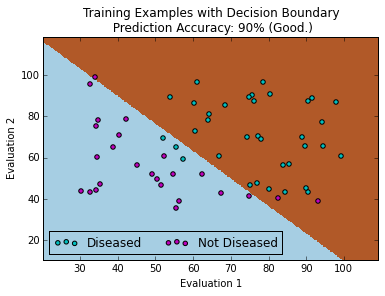

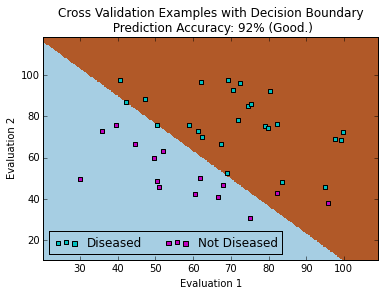

In [28]:
# Plot for Training Examples and Cross Validation Examples

# step size in the mesh (make sure that h > 0.1)
h = .3 

# plot the decision boundary by assigning a color to each point in the mesh
x_min, x_max = X[:,0].min() - 10, X[:,0].max() + 10
y_min, y_max = X[:,1].min() - 25, X[:,1].max() + 20
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = logreg.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot the training points
plt.figure(1)
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)
pscatt = plt.scatter(pos[:,0], pos[:,1], color = 'c', marker = 'o', edgecolors='k')
nscatt = plt.scatter(neg[:,0], neg[:,1], color = 'm', marker = 'o', edgecolors='k')
plt.xlabel('Evaluation 1')
plt.ylabel('Evaluation 2')
plt.legend([pscatt, nscatt], ['Diseased', 'Not Diseased'], loc="lower left", ncol=2)
plt.title('Training Examples with Decision Boundary \n Prediction Accuracy: %i%% (%s)' %(ta, comment1))
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())

# Plot the cv points
plt.figure(2)
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)
pscatt = plt.scatter(poscv[:,0], poscv[:,1], color = 'c', marker = 's', edgecolors='k')
nscatt = plt.scatter(negcv[:,0], negcv[:,1], color = 'm', marker = 's', edgecolors='k')
plt.xlabel('Evaluation 1')
plt.ylabel('Evaluation 2')
plt.legend([pscatt, nscatt], ['Diseased', 'Not Diseased'], loc="lower left", ncol=2)
plt.title('Cross Validation Examples with Decision Boundary \n Prediction Accuracy: %i%% (%s)' %(cva, comment2))
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())

plt.show()
plt.close()